In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'martial-status', 'occupation', 'relationship', 'race',
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                'native-country', 'label']

train_df = pd.read_csv('adult.data',names = cols, header = None ,index_col = False)
test_df = pd.read_csv('adult.test',names = cols, header = None ,index_col = False, skiprows = 1)

In [3]:
train_df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [4]:
# Data cleaning:
# education num is a label encoding, we want to do one-hot so we drop education-num
#train_df = train_df.drop('education-num', axis='columns')
#test_df = test_df.drop('education-num', axis='columns')

# drop all rows with unknown values
def clear_unknown_rows(df):
    df = df.replace(' ?',np.NaN)
    # existed in test but not training set, can do this in a better way but skipping for now
    df = df.replace(' Holand-Netherlands', np.NaN)
    df = df.dropna()
    return df

train_df = clear_unknown_rows(train_df)
test_df = clear_unknown_rows(test_df)
train_df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


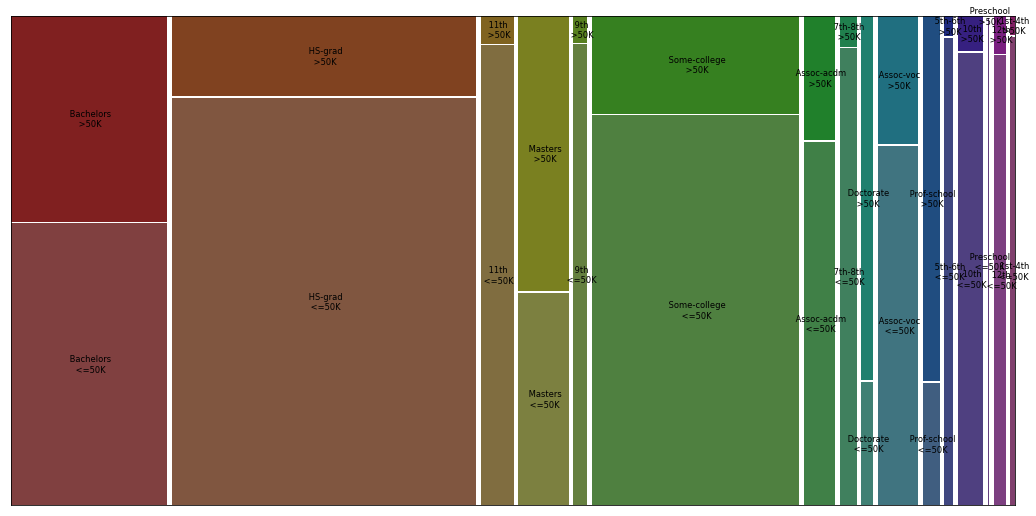

In [5]:
from statsmodels.graphics.mosaicplot import mosaic
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,9))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
mosaic(train_df, ['education', 'label'], ax=axes, axes_label=False)
plt.show()

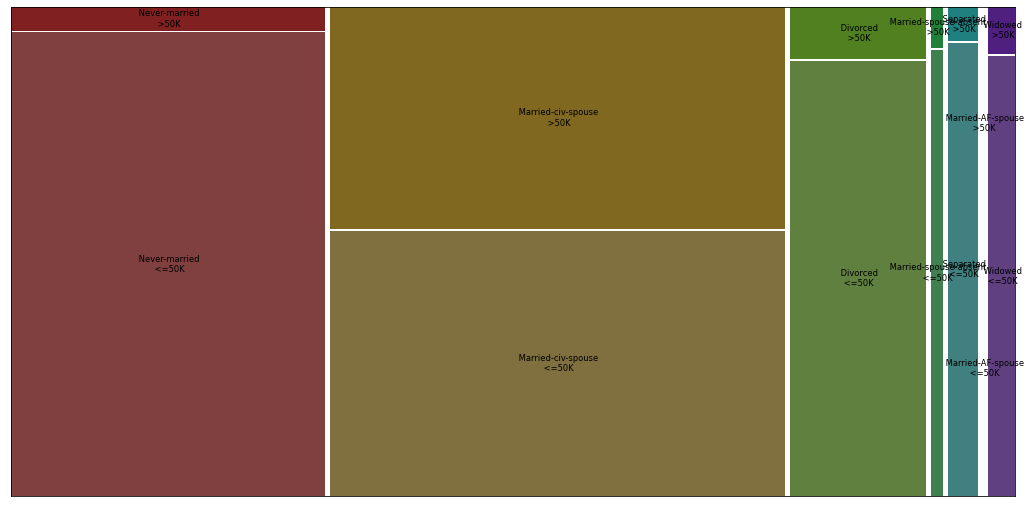

In [6]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,9))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
mosaic(train_df, ['martial-status', 'label'], ax=axes, axes_label=False)
plt.show()

In [7]:
train_df.replace({' <=50K.': 0, ' >50K.' : 1, ' <=50K': 0, ' >50K' : 1}, inplace=True)
train_df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [24]:
import plotly.graph_objects as go
import pandas as pd

education_dim = go.parcats.Dimension(
    values=train_df["education-num"],
    categoryorder='category descending', label="Education"
)

race_dim = go.parcats.Dimension(values=train_df.race, label="Race")

relationship_dim = go.parcats.Dimension(values=train_df.relationship, label="Relation")

gender_dim = go.parcats.Dimension(values=train_df.sex, label="Gender")

label_dim = go.parcats.Dimension(
    values=train_df.label, categoryarray=[0, 1], label="Salary",
    ticktext=[' <=50K', ' >50K'])

color = train_df.label;
colorscale = [[0, 'lightsteelblue'], [1, 'firebrick']];

fig = go.Figure(data = [go.Parcats(dimensions=[education_dim, gender_dim, relationship_dim, label_dim],
               line={'color': color, 'colorscale': colorscale})])

fig.show()